# Tutorial -  Volatilidad
Sergio Cabrales, Universidad de los Andes

https://www.sac2.com/

## 1. Carga de librerías, funciones y APIs necesarias.

#### 1.1. Instalan las librerías que no incluye Google Colab

In [1]:
pip install yfinance

In [2]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


#### 1.2. Se cargan las librerías requeridas

In [3]:
# Funciones numéricas adicionales
import numpy as np

# Lectura de datos y manejo de Data-sets
import pandas as pd
import matplotlib.pyplot as plt


# Datos
import yfinance as yfin

# Gráficos
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#analisis tecnico
import mplfinance as mpf

# Probabilidad y estadística
import math
from scipy.stats import norm, chi2, jarque_bera
from scipy.optimize import brentq
from scipy import stats


## 2. Obtención de datos históricos

#### 2.1. Descarga de datos desde Yahoo Finance

https://finance.yahoo.com/


In [4]:
# Descargamos datos de la acción sleccionada:
df = yfin.download('GOOGL', start='2005-01-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2024-03-01,138.429993,138.869995,136.919998,137.139999,137.139999,31119500
2024-03-04,135.660004,135.660004,131.910004,133.350006,133.350006,55999400
2024-03-05,131.880005,133.240005,130.669998,132.669998,132.669998,40194800


## 3. Visualización y Estadísticas Descriptivas

### 3.1. Utiliza la librería mpf para hacer un gráfico de velas japonesas de la acción

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


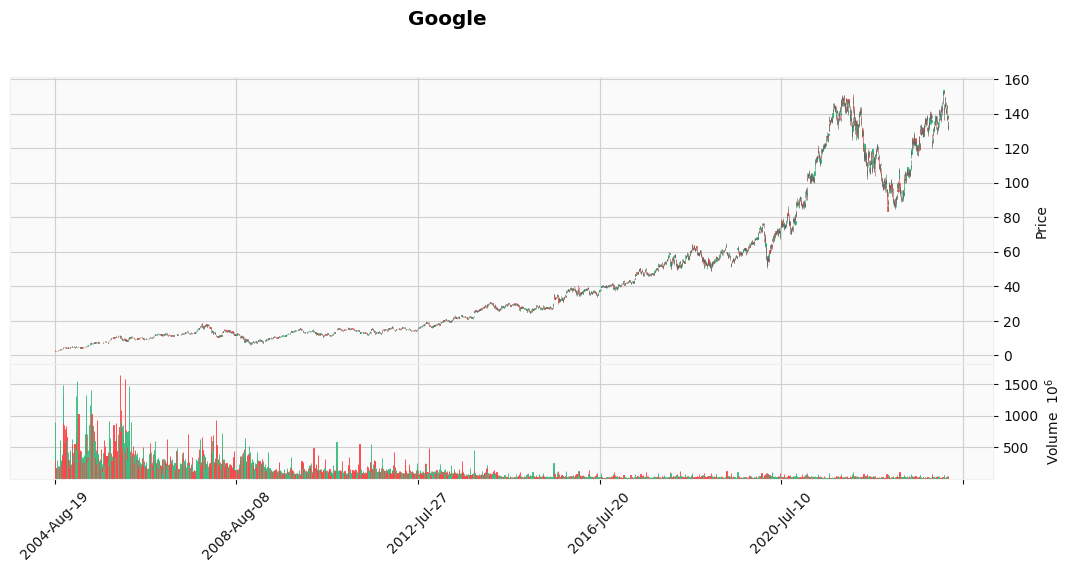

In [23]:
mpf.plot(df,type='candle', volume=True,figratio=(19,8),style='yahoo',title='Google')

## 4. Retornos

### 4.1. Retornos Logarítmicos

Los retornos logarítmicos se calculan como:
$$
r_{t} = ln \left( \frac{S_t}{S_{t-1}} \right ) = ln \left( S_{t} \right) - ln \left( S_{t-1} \right)
$$

In [6]:
# Guardamos los retornos logaritmicos en una nueva columna.
df['Log Returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
df['Log Returns'][0] = 0
df

<ipython-input-6-146a19f928ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Returns'][0] = 0


,Open,High,Low,Close,Adj Close,Volume,Log Returns
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924,0.000000
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856,0.076433
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512,0.010014
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748,-0.042290
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044,0.010718
...,...,...,...,...,...,...,...
2024-03-01,138.429993,138.869995,136.919998,137.139999,137.139999,31119500,-0.009579
2024-03-04,135.660004,135.660004,131.910004,133.350006,133.350006,55999400,-0.028025
2024-03-05,131.880005,133.240005,130.669998,132.669998,132.669998,40194800,-0.005112


### 4.3. Retornos Logarítmicos anualizados

Podemos calcular el log-retorno anual ($r$) como el número de días bursátiles (252 días) por el promedio del log-retorno diario:

$$
r = 252 \bar{r_t}
$$

In [7]:
# Podemos imprimir el retornos anual:
LogReturns = np.mean(df["Log Returns"])*252
LogReturns

0.20381914485005473

### 4.4. Gráfica de retornos
- Podemos graficar los retornos igual que como graficamos los precios.

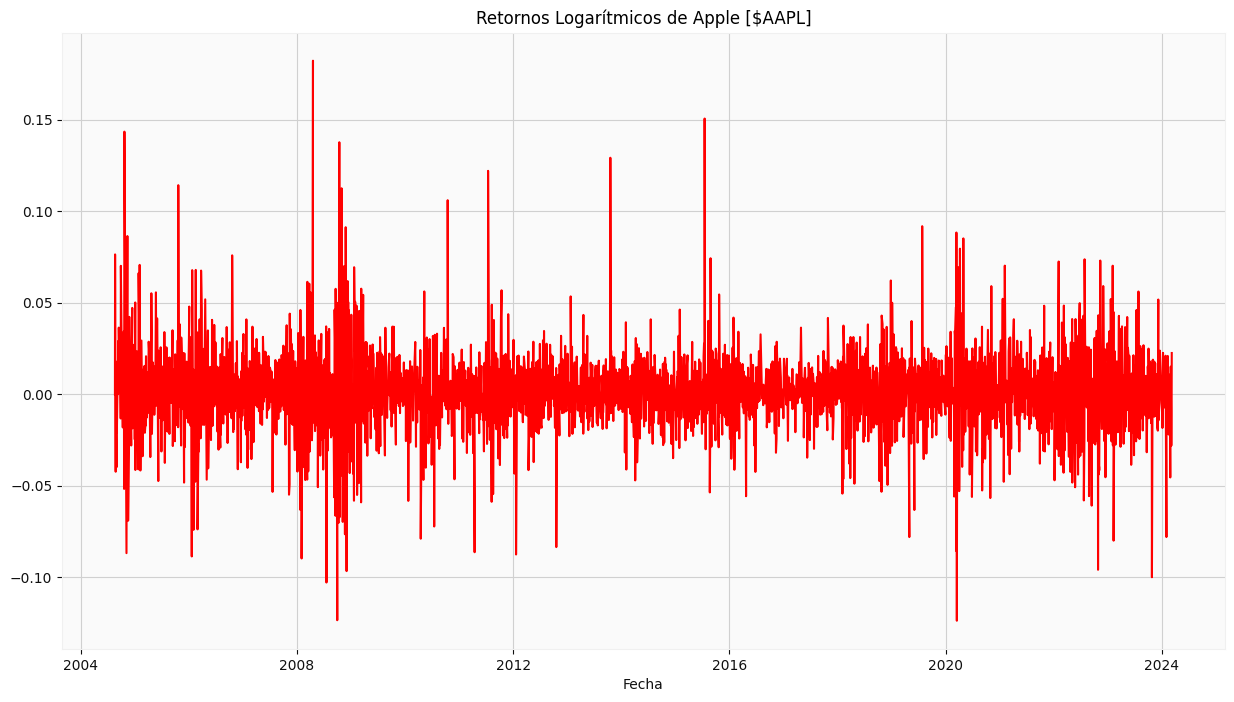

In [8]:
# Gráfico de los retornos logarítmicos
plt.figure(figsize=(15,8))
plt.plot(df['Log Returns'], color = 'red')
plt.title('Retornos Logarítmicos de Apple [$AAPL]')
plt.xlabel('Fecha')
plt.show()

## 5. Volatilidad

### 5.1 Volatilidad diaria y anual

La volatilidad diaria del activo es la desviación estándar de sus retornos o la raíz de la varianza:  

$$vol=desv(r)=\sqrt{Var(r)}$$

En finanzas, se utiliza con mayor frecuencia la volatilidad anualizada ($\sigma$) en lugar de la volatilidad diaria. Teniendo en cuenta que en cada año hay 252 días bursátiles:

$$ \sigma^{2} = \sum_{1}^{252} Var_{diaria}$$
$$ \sigma^{2} = 252 \sigma_{diaria}^{2}$$

Se saca la raíz cuadra a ambos lados para calcular la volatilidad:

$$ \sqrt{\sigma^{2}} = \sqrt{252 \sigma_{diaria}^{2}}$$
$$ \sigma = \sigma_{diaria} \sqrt{252}$$

In [9]:
# Calculamos la volatilidad diaria con los retornos logaritmicos.
vol_d = np.std(df['Log Returns'])

# Anualizamos la volatilidad diaria.
vol_a = vol_d * np.sqrt(252)

print("Volatilidad diaria: {:.4f} %".format(100*vol_d))
print("Volatilidad anualizada: {:.4f} %".format(100*vol_a))

Volatilidad diaria: 1.9236 %
Volatilidad anualizada: 30.5361 %


## 6. EWMA Function (Risk Metrics)

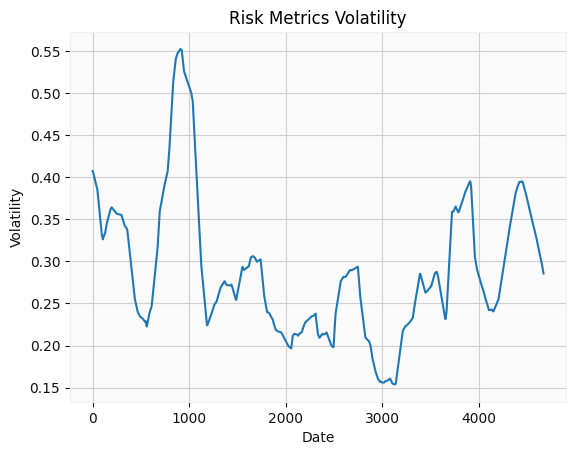

In [24]:
# calculate the rolling standard deviation using the Risk Metrics model
window = 252
lambda_param = 0.94
variance = [df['Log Returns'][:window].var()]
for i in range(window, len(df['Log Returns'])):
    variance.append(lambda_param * variance[-1] + (1 - lambda_param) * df['Log Returns'][i-window:i].var())
std = pd.Series(np.sqrt(variance)*np.sqrt(252))

# plot the results
import matplotlib.pyplot as plt
plt.plot(std)
plt.title("Risk Metrics Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

## 9. Implied Volatility

In [29]:
def black_scholes_call(S, K, r, sigma, T):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    N = norm.cdf
    return S*N(d1) - K*np.exp(-r*T)*N(d2)

def implied_volatility(S, K, r, T, market_price, sigma_guess=0.30):
    """
    Calculate the implied volatility of a European call option using the Black-Scholes formula.

    Parameters:
    S (float): underlying asset price
    K (float): option strike price
    r (float): risk-free interest rate
    T (float): time to maturity in years
    market_price (float): observed market price of the option
    sigma_guess (float, optional): initial guess for the volatility

    Returns:
    float: the implied volatility
    """
    def f(sigma):
        return black_scholes_call(S, K, r, sigma, T) - market_price
    return brentq(f, 0.0001, 1, xtol=1e-10, rtol=1e-10, maxiter=100000)

In [33]:
S =
K =
r = 0.0499749
T =
market_price =

implied_vol = implied_volatility(S, K, r, T, market_price)
print("Implied volatility: {:.4f}".format(implied_vol))

Implied volatility: 0.2844
